# Deep Learning Lab - 1. Artificial Neural Network

In this lab, we build a very basic neural network model by using keras and tensorflow in five simple steps:

1. load the dataset and split it into train and validation datasets
2. define our model using Keras with TensorFlow as backend
3. compile our model by specifying loss function and optimizer
4. fit our model to the train dataset
5. evaluate our model on the validation dataset

## Step 0: Install dependencies

In this lab, we use [TensorFlow](https://www.tensorflow.org/). TensorFlow is an open-source platform developed by Google for machine learning and deep learning. if you are using Kaggle or Google Colab environment, you can use TensorFlow without installing that but if you want to run your code locally you can install Tensorflow by using the following command with pip:

In [ ]:
! pip install tensorflow==2.16.1

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

## Step 1: Data Prepareation

We use and load [MNISt Dataset](https://en.wikipedia.org/wiki/MNIST_database). It is a large dataset of handwritten digits.

Tensorflow internally has some methods for support various prominent datasets such MNIST, CIFAR10 and etc.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The dataset consists of 28x28 grayscale images of handwritten digits (0-9). Each pixel in these images has an unsigned integer value ranging from 0 to 255, representing the intensity of the pixel. To reduce computational complexity and improve model accuracy, these pixel values are normalized by scaling them to a range between 0 and 1.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Step 2: Define the Model
* Models in Keras are defined as a sequence of layers. We create a `Sequential` model and add layers one at a time. The first thing to get right is to ensure the input layer has the right number of inputs.
*  Fully connected layers are defined using the `Dense` class. We can specify the number of neurons in the layer as the first argument, specify the activation function using the `activation` argument.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(24, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

## Step 3: Compile the model
We specify the loss function to use to evaluate a set of weights. We will use `sparse_categorical_crossentropy` which is defined in Keras for multi-class classification problems where the target labels are provided as integers. We also specify the optimizer used to search through different weights for the network. Here we will use `adam` optimizer.

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 24)             │        18,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,270 (75.27 KB)

 Trainable params: 19,270 (75.27 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Fit Model
We can fit the model using the `fit()` method. We can also set the number of instances that are evaluated before a weight update in the network is performed called the **batch size** and set using the `batch_size` argument.

In [ ]:
print(y_train.shape)
print(x_train.shape)
history = model.fit(x_train, y_train, epochs=150, batch_size=50, verbose = 1)

(60000,)
(60000, 28, 28)
Epoch 1/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7491 - loss: 0.8410
Epoch 2/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9310 - loss: 0.2434
Epoch 3/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9471 - loss: 0.1873
Epoch 4/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9502 - loss: 0.1698
Epoch 5/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9553 - loss: 0.1520
Epoch 6/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9577 - loss: 0.1434
Epoch 7/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9611 - loss: 0.1301
Epoch 8/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9636 - loss: 0.1189
Epoch 9/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9674 - loss: 0.1066
Epoch 10/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1025
Epoch 11/150
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9711 - loss: 0

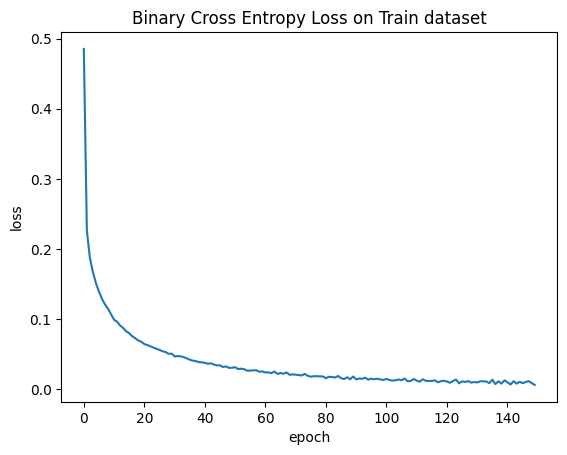

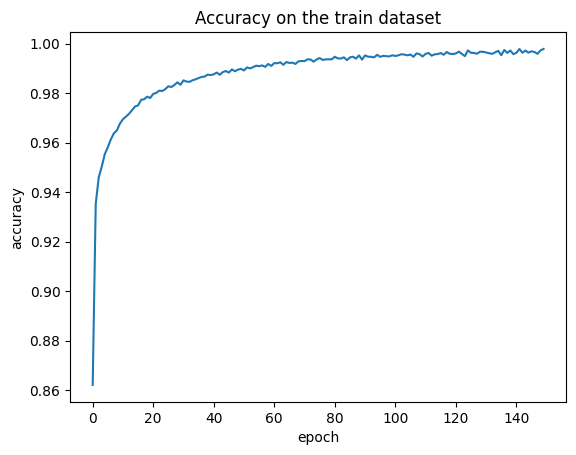

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Step 5: Evaluate model
We can evaluate our model on validation dataset using the `evaluate()` function. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy that we set before.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9510 - loss: 0.5319
Loss :  0.4398405849933624
Accuracy :  0.9580000042915344


In [ ]:
prediction = model.predict([x_test])[:6]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import numpy as np
pr = [np.argmax(i)for i in prediction]

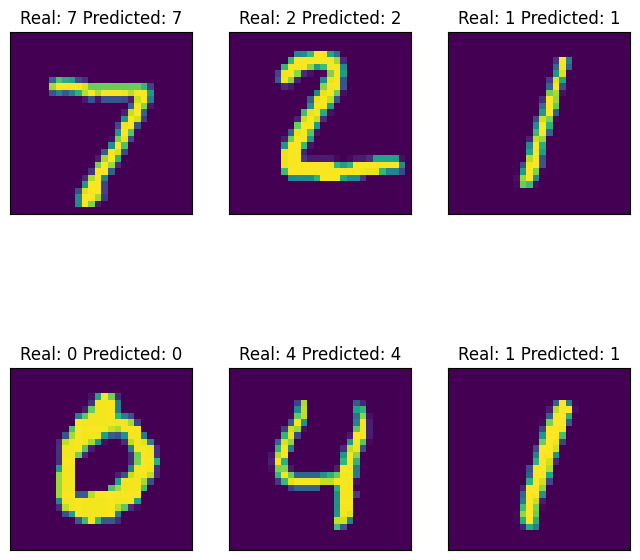

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(8, 8))

for i in range(2):
    for j in range(3):
        axs[i][j].imshow(x_test[i*3+j])
        axs[i][j].set_title(f'Real: {y_test[i*3+j]} Predicted: {pr[i*3+j]}')
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])

plt.show()